# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading dataset
data = pd.read_csv('Car24_dataset.csv')

In [3]:
# First 5 rows of data
data.head()

,Unnamed: 0,Brand,Owner,kilometers,Fuel,Transmission,Model,Price
0,0,2012 Maruti Swift Dzire,1st Owner,"2,13,186 km",Diesel,Manual,VDI BS IV Manual,"₹2,63,299"
1,1,2012 Maruti Swift,1st Owner,"38,061 km",Diesel,Manual,VDI Manual,"₹2,92,299"
2,2,2012 Maruti Swift,1st Owner,"31,084 km",Diesel,Manual,VDI Manual,"₹2,82,099"
3,3,2012 Maruti Swift,1st Owner,"26,568 km",Diesel,Manual,VDI Manual,"₹2,89,099"
4,4,2017 Nissan Terrano,1st Owner,"49,610 km",Diesel,Automatic,XV PREMIUM 110 PS AMT DEISEL Automatic,"₹7,73,899"


In [4]:
# Drop unwanted column 'Unnamed: 0'
data.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
# Dimensions of the dataset
data.shape

(10000, 7)

Dataset consits of 10000 rows and 7 columns

In [6]:
# Separating Year and Brand from Brand column
y = data['Brand'].str.split(" ", n = 1, expand = True)
data['Year']=y[0]
data['Brand']=y[1]

In [7]:
# Removing 'Manual' from Model column
m = data['Model'].str.split("Manual", n = 3, expand = True)
data['Model']=m[0]

In [8]:
data['kilometers']=data['kilometers'].str.replace('km','')
data['kilometers']=data['kilometers'].str.replace(',','')
data['Price']=data['Price'].str.replace('₹','')
data['Price']=data['Price'].str.replace(',','')

In [9]:
data['Price']=data['Price'].str.strip()

In [10]:
#Checking for missing data
data.isnull().sum()

Brand             0
Owner             0
kilometers        0
Fuel              0
Transmission    149
Model             0
Price             0
Year              0
dtype: int64

In [11]:
data['Transmission'].mode()

0    Manual
dtype: object

In [12]:
data['Transmission'] = data['Transmission'].fillna(data['Transmission'].mode()[0])

In [13]:
data.isnull().sum()

Brand           0
Owner           0
kilometers      0
Fuel            0
Transmission    0
Model           0
Price           0
Year            0
dtype: int64

<AxesSubplot:>

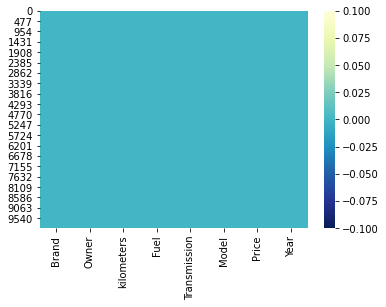

In [14]:
# Plotting heatmap for missing data
sns.heatmap(data.isnull(), cmap='YlGnBu_r')

As we can see, there are no null values in the dataset and we can proceed further

In [15]:
# Checking the data types of each column
data.dtypes

Brand           object
Owner           object
kilometers      object
Fuel            object
Transmission    object
Model           object
Price           object
Year            object
dtype: object

We can see that all the data has been of object datatype and we need to convert them into numerical data before the model building process.

In [16]:
data['Price']=data['Price'].astype(float)
data['kilometers']=data['kilometers'].astype(float)

In [17]:
data.dtypes

Brand            object
Owner            object
kilometers      float64
Fuel             object
Transmission     object
Model            object
Price           float64
Year             object
dtype: object

In [18]:
# Columns names of the dataset
data.columns

Index(['Brand', 'Owner', 'kilometers', 'Fuel', 'Transmission', 'Model',
       'Price', 'Year'],
      dtype='object')

## Exploratory Data Analysis (EDA)

### Univariate and Bivariate Analysis

Petrol          6523
Diesel          3316
Petrol + CNG     160
Petrol + LPG       1
Name: Fuel, dtype: int64


<AxesSubplot:xlabel='Fuel', ylabel='count'>

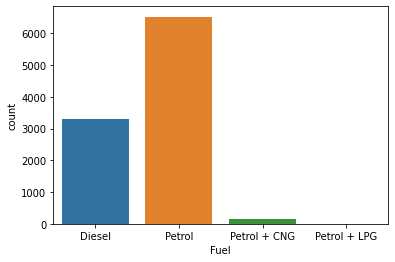

In [19]:
# Plotting the countplot for fuel
print(data['Fuel'].value_counts())
sns.countplot(data['Fuel'])

We can see that Petrol is the maximum fuels used by cars, whereas Diesel, CNG and LPG are the least used.

Manual       8105
Automatic    1895
Name: Transmission, dtype: int64


<AxesSubplot:xlabel='Transmission', ylabel='count'>

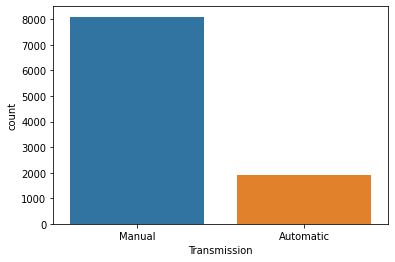

In [20]:
#Plotting the countplot for transmission
print(data['Transmission'].value_counts())
sns.countplot(data['Transmission'])

Most of the cars have manual transmission as the highest weightage.

2017    1962
2018    1609
2016    1391
2015    1222
2019    1109
2014    1017
2013     688
2020     401
2012     363
2011     108
2021      57
2010      38
2009      32
2008       3
Name: Year, dtype: int64


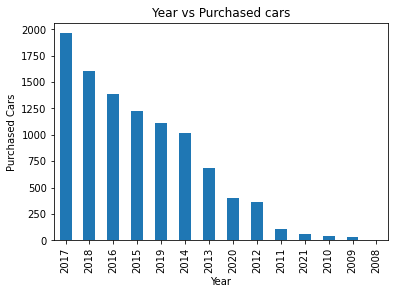

In [21]:
# Value_counts for year
print(data['Year'].value_counts())

# Plotting year vs no. of cars
purchased_car_per_year = data['Year'].value_counts()
purchased_car_per_year.plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Purchased Cars")
plt.title("Year vs Purchased cars")
plt.show()

Maximum number of cars are bought in the year 2017 whereas minimum number of cars were brought in 2009 and 2008

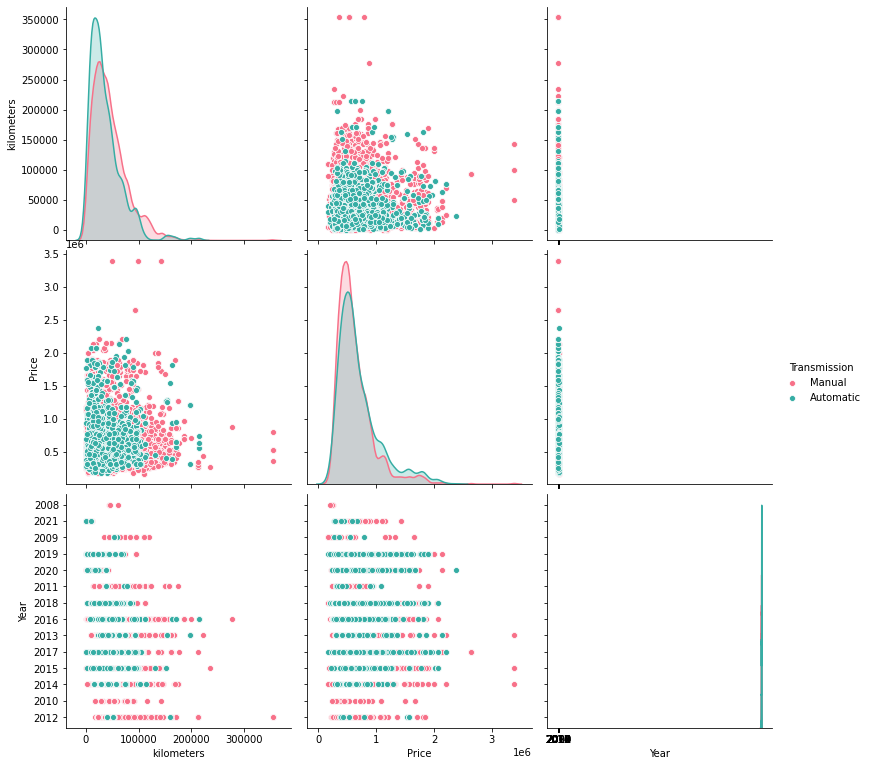

In [22]:
# Plotting pairplot for transmission
sns.pairplot(data,hue = 'Transmission',diag_kind = "kde",kind = "scatter",palette = "husl",height=3.5) 
plt.show()

In [23]:
#Assigning dataframe for manual and automatic
manual = data[data['Transmission']=='Manual']
automatic = data[data['Transmission']=='Automatic']

Manual type car


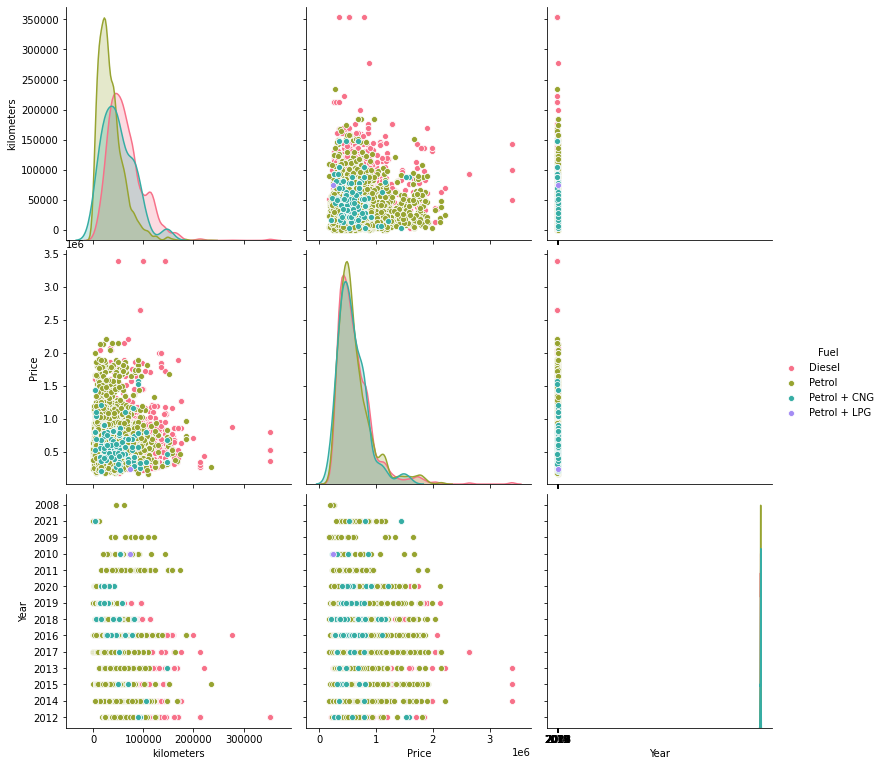

In [24]:
print('Manual type car')
sns.pairplot(manual, hue ='Fuel', diag_kind ="kde", kind = "scatter", palette = "husl", height=3.5)
plt.show()

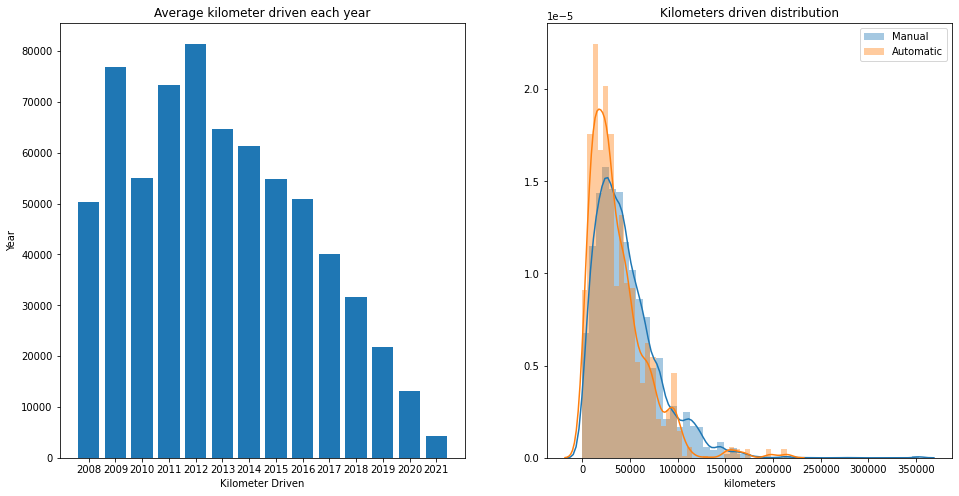

In [25]:
# Plotting for year vs km_driven
km_mean = data.groupby('Year')['kilometers'].mean()

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(16,8))

ax[0].bar(km_mean.index,km_mean)
sns.distplot(manual['kilometers'],ax=ax[1])
sns.distplot(automatic['kilometers'],ax=ax[1])

ax[0].set_title('Average kilometer driven each year')
ax[0].set_xlabel('Kilometer Driven')
ax[0].set_ylabel('Year')

ax[1].set_title('Kilometers driven distribution')
ax[1].legend(['Manual','Automatic'])

plt.show()

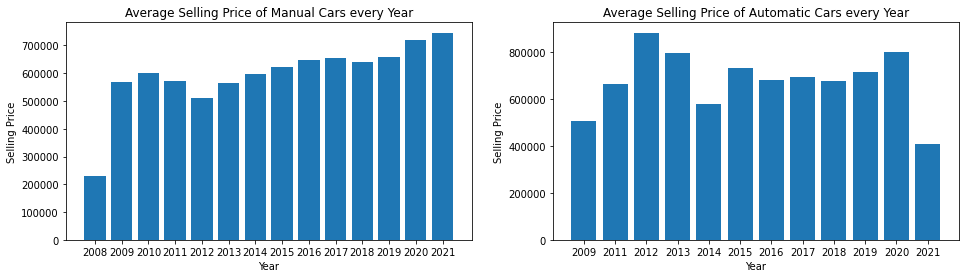

In [26]:
# Year and selling price
year_mean_manual = data[data['Transmission']=='Manual'].groupby('Year')['Price'].mean()
year_mean_automatic =data[data['Transmission']=='Automatic'].groupby('Year')['Price'].mean()

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))

ax[0].bar(year_mean_manual.index,year_mean_manual)
ax[1].bar(year_mean_automatic.index,year_mean_automatic)

ax[0].set_title('Average Selling Price of Manual Cars every Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Selling Price')

ax[1].set_title('Average Selling Price of Automatic Cars every Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Selling Price')

plt.show()

# Converting categorical data into numerical data

In [27]:
# Converting fuel and transmission data using LabelEncoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col=['Fuel','Transmission','Owner']   
for i in col:
    data[i] = le.fit_transform(data[i])

In [28]:
data['Year']=data['Year'].astype(int)
data['Owner']=data['Owner'].astype(int)

In [29]:
data 

,Brand,Owner,kilometers,Fuel,Transmission,Model,Price,Year
0,Maruti Swift Dzire,0,213186.0,0,1,VDI BS IV,263299.0,2012
1,Maruti Swift,0,38061.0,0,1,VDI,292299.0,2012
2,Maruti Swift,0,31084.0,0,1,VDI,282099.0,2012
3,Maruti Swift,0,26568.0,0,1,VDI,289099.0,2012
4,Nissan Terrano,0,49610.0,0,0,XV PREMIUM 110 PS AMT DEISEL Automatic,773899.0,2017
...,...,...,...,...,...,...,...,...
9995,Tata Tiago,0,38855.0,1,1,VXI OPT,693699.0,2018
9996,Maruti Swift Dzire,0,23306.0,1,1,5 STR WITH AC PLUSHTR,660099.0,2016
9997,Maruti Baleno,0,20371.0,1,1,5 STR WITH AC PLUSHTR,660099.0,2019
9998,Maruti Baleno,0,17273.0,1,1,LXI,419999.0,2019


### Multivariate Analysis

In [30]:
# Statiscal Information
data.describe()

,Owner,kilometers,Fuel,Transmission,Price,Year
count,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,0.197000,44600.888200,0.684600,0.810500,6.427195e+05,2016.260800
std,0.444084,32918.503301,0.498546,0.391925,3.264771e+05,2.205962
min,0.000000,58.000000,0.000000,0.000000,1.716990e+05,2008.000000
25%,0.000000,20989.750000,0.000000,1.000000,4.273990e+05,2015.000000
50%,0.000000,37840.000000,1.000000,1.000000,5.569990e+05,2017.000000
75%,0.000000,59773.000000,1.000000,1.000000,7.629240e+05,2018.000000
max,4.000000,353288.000000,3.000000,1.000000,3.388499e+06,2021.000000


<b>Observations:</b>

1.The minimum value is 0 for all other columns.

2.The 75th percentile and max value difference for km_driven column is high and it is due to the presence of outliers.

In [31]:
# Checking correlation of the dataset
corr=data.corr()   
corr

,Owner,kilometers,Fuel,Transmission,Price,Year
Owner,1.000000,0.038498,0.022739,-0.053833,0.001772,-0.155357
kilometers,0.038498,1.000000,-0.419508,0.107693,-0.042590,-0.489809
Fuel,0.022739,-0.419508,1.000000,-0.091457,-0.032324,0.153462
Transmission,-0.053833,0.107693,-0.091457,1.000000,-0.085063,-0.186791
Price,0.001772,-0.042590,-0.032324,-0.085063,1.000000,0.110307
Year,-0.155357,-0.489809,0.153462,-0.186791,0.110307,1.000000


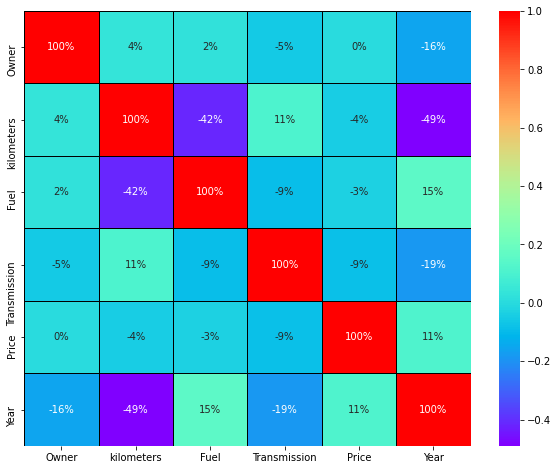

In [32]:
# Plotting heatmap for visualizing the correlation
plt.figure(figsize=(10,8))
sns.heatmap(corr,linewidth=0.5,linecolor='black',fmt='.0%',cmap='rainbow',annot=True)
plt.show()

<b>Observations:</b>

1.There are more negative correlations present in the dataset

2.Highest positive correlated column has a value of 15%.

3.Highest negatively correlated column has a value of -49%

4.Positively correlated columns have a high impact with the target variable whereas negatively correlated columns have less or zero impact with the target variable.

Text(0.5, 1.0, 'Correlation with Target variable')

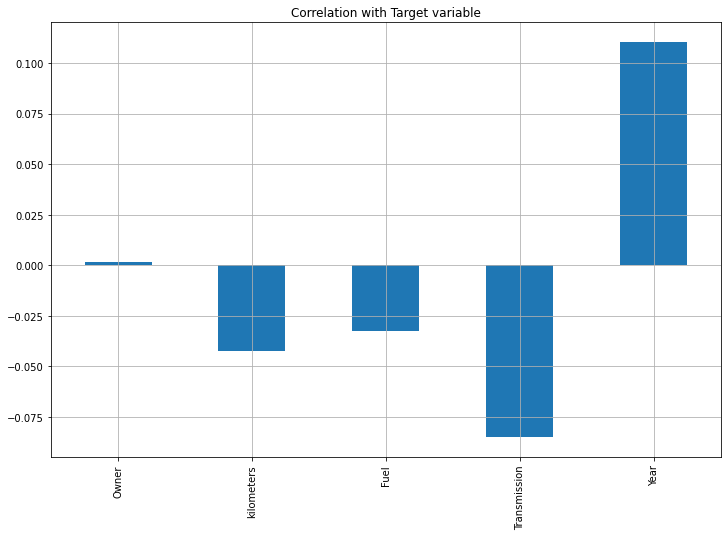

In [33]:
# Correlation with target variable
plt.figure(figsize=(12,8))
data.drop('Price',axis=1).corrwith(data['Price']).plot(kind='bar',grid=True)
plt.title('Correlation with Target variable')

We can see that year column is the only highly correlated column.

In [34]:
# Dropping Brand column
data.drop(['Brand'],axis=1,inplace=True)

In [35]:
# Dropping Model column
data.drop(['Model'],axis=1,inplace=True)

# Checking outliers

<AxesSubplot:xlabel='kilometers'>

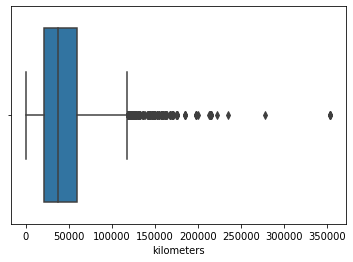

In [36]:
# Plotting boxplots to check the outliers.
sns.boxplot(data['kilometers'])

<AxesSubplot:xlabel='Fuel'>

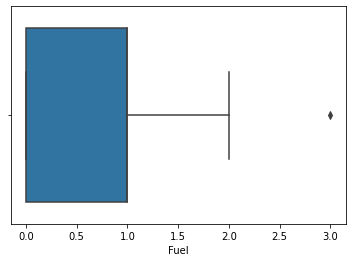

In [37]:
sns.boxplot(data['Fuel'])

<AxesSubplot:xlabel='Transmission'>

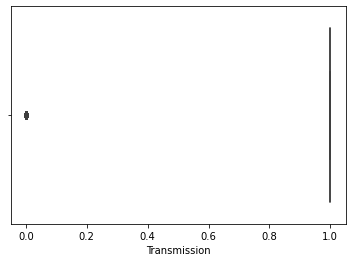

In [38]:
sns.boxplot(data['Transmission'])

<AxesSubplot:xlabel='Price'>

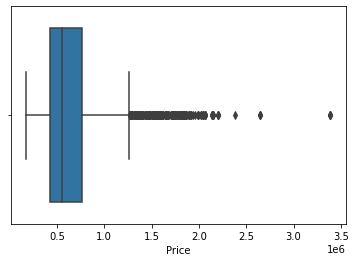

In [39]:
sns.boxplot(data['Price'])

<AxesSubplot:xlabel='Year'>

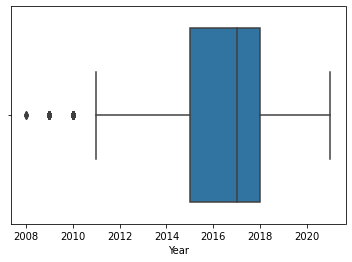

In [40]:
sns.boxplot(data['Year'])

In [41]:
data 

,Owner,kilometers,Fuel,Transmission,Price,Year
0,0,213186.0,0,1,263299.0,2012
1,0,38061.0,0,1,292299.0,2012
2,0,31084.0,0,1,282099.0,2012
3,0,26568.0,0,1,289099.0,2012
4,0,49610.0,0,0,773899.0,2017
...,...,...,...,...,...,...
9995,0,38855.0,1,1,693699.0,2018
9996,0,23306.0,1,1,660099.0,2016
9997,0,20371.0,1,1,660099.0,2019
9998,0,17273.0,1,1,419999.0,2019


# Handeling the Outliers by using z-score method

In [42]:
from scipy.stats import zscore
z = np.abs(zscore(data))
threshold=3
np.where(z>3)

(array([   0,   31,   37,   69,  141,  148,  149,  150,  174,  204,  218,
         245,  267,  290,  384,  414,  427,  428,  432,  444,  468,  497,
         503,  505,  531,  575,  590,  605,  639,  642,  647,  656,  677,
         687,  693,  708,  722,  754,  763,  783,  783,  790,  813,  838,
         861,  864,  865,  865,  881,  902,  918,  925,  934,  944,  945,
         958,  971,  985,  990,  997,  998, 1003, 1006, 1015, 1021, 1057,
        1064, 1142, 1144, 1158, 1164, 1173, 1217, 1224, 1230, 1244, 1253,
        1261, 1269, 1298, 1303, 1337, 1408, 1415, 1416, 1417, 1441, 1470,
        1484, 1511, 1533, 1556, 1650, 1681, 1696, 1697, 1700, 1712, 1739,
        1773, 1779, 1780, 1806, 1850, 1866, 1882, 1917, 1920, 1925, 1939,
        1968, 1973, 2007, 2078, 2085, 2086, 2087, 2111, 2140, 2154, 2181,
        2203, 2226, 2320, 2351, 2366, 2367, 2370, 2382, 2409, 2443, 2449,
        2450, 2476, 2520, 2536, 2552, 2587, 2590, 2595, 2609, 2638, 2643,
        2677, 2748, 2755, 2756, 2757, 

In [43]:
# Removing Outliers
df = data[(z<3).all(axis=1)]
df

,Owner,kilometers,Fuel,Transmission,Price,Year
1,0,38061.0,0,1,292299.0,2012
2,0,31084.0,0,1,282099.0,2012
3,0,26568.0,0,1,289099.0,2012
4,0,49610.0,0,0,773899.0,2017
5,1,77787.0,1,1,248299.0,2010
...,...,...,...,...,...,...
9995,0,38855.0,1,1,693699.0,2018
9996,0,23306.0,1,1,660099.0,2016
9997,0,20371.0,1,1,660099.0,2019
9998,0,17273.0,1,1,419999.0,2019


In [44]:
print(data.shape)
print(df.shape)

(10000, 6)
(9405, 6)


In [45]:
# Dataloss
dataloss = ((10000-9405)/10000)*100
dataloss

5.949999999999999

Approx 6% Data loss, data has been removed and it's not a big loss.

# Checking skewness

In [46]:
data.skew()

Owner           2.270822
kilometers      1.704650
Fuel           -0.389687
Transmission   -1.584804
Price           2.010118
Year           -0.429268
dtype: float64

## Treating skewness

In [47]:
#We are treating skewness by using square root transform
for col in df.skew().index:
    if col in df.describe().columns:
        if df[col].skew()>0.55:
            df[col]=np.sqrt(df[col])
        if df[col].skew()<-0.55:
            df[col]=np.sqrt(df[col])  

In [48]:
df.skew()

Owner           1.807238
kilometers      0.149099
Fuel           -0.423006
Transmission   -1.630856
Price           0.708395
Year           -0.356758
dtype: float64

## Scaling the data

In [49]:
#Scaling the dataset using StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df)
x=pd.DataFrame(x,columns=df.columns)
x

,Owner,kilometers,Fuel,Transmission,Price,Year
0,-0.444215,0.020727,-1.391269,0.474939,-1.440400,-2.022319
1,-0.444215,-0.248323,-1.391269,0.474939,-1.501339,-2.022319
2,-0.444215,-0.438944,-1.391269,0.474939,-1.459402,-2.022319
3,-0.444215,0.416599,-1.391269,-2.105535,0.730715,0.306612
4,2.251165,1.221070,0.625514,0.474939,-1.711579,-2.953891
...,...,...,...,...,...,...
9400,-0.444215,0.049721,0.625514,0.474939,0.430859,0.772398
9401,-0.444215,-0.586947,0.625514,0.474939,0.300098,-0.159175
9402,-0.444215,-0.729251,0.625514,0.474939,0.300098,1.238184
9403,-0.444215,-0.891093,0.625514,0.474939,-0.752529,1.238184


In [50]:
x=df.drop('Price',axis=1)    
y=df['Price']     

## Model Building

In [51]:
# Impoting train_test_split, LogisticRegression, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr =LinearRegression()
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [52]:
# Finding the best random state and r2_score
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print('At random state',i,',the model performs well')
        print('Training r2_score is: ',r2_score(y_train,pred_train)*100)
        print('Testing r2_score is: ',r2_score(y_test,pred_test)*100)

At random state 51 ,the model performs well
Training r2_score is:  3.0566059461292205
Testing r2_score is:  3.119869670074926
At random state 73 ,the model performs well
Training r2_score is:  3.066001643570515
Testing r2_score is:  3.105959047885354
At random state 95 ,the model performs well
Training r2_score is:  3.0614012886874042
Testing r2_score is:  3.1180250490598027


In [53]:
# Creating train_test_split using best random_state
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=51,test_size=.20)

## Finding the best model

In [54]:
#I mporting models and  metrices  
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet,Ridge
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [55]:
LR=LinearRegression()
l=Lasso()
en=ElasticNet()
rd=Ridge()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()
rf=RandomForestRegressor()
ab=AdaBoostRegressor()
gb=GradientBoostingRegressor()

In [56]:
models= []
models.append(('Linear Regression',LR))
models.append(('Lasso Regression',l))
models.append(('Elastic Net Regression',en))
models.append(('Ridge Regression',rd))
models.append(('Decision Tree Regressor',dtr))
models.append(('KNeighbors Regressor',knr))
models.append(('RandomForestRegressor',rf))
models.append(('AdaBoostRegressor',ab))
models.append(('GradientBoostingRegressor',gb))

In [57]:
#Finding the required metrices for all models together using a for loop
Model=[]
score=[]
cvs=[]
sd=[]
mae=[]
mse=[]
rmse=[]
for name,model in models:
    print('******************************',name,'***************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=r2_score(y_test,pre)
    print('r2_score: ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('cross_val_score: ',sc)
    cvs.append(sc*100)
    print('\n')
    std=cross_val_score(model,x,y,cv=5,scoring='r2').std()
    print('Standard Deviation: ',std)
    sd.append(std)
    print('\n')
    MAE=mean_absolute_error(y_test,pre)
    print('Mean Absolute Error: ',MAE)
    mae.append(MAE)
    print('\n')
    MSE=mean_squared_error(y_test,pre)
    print('Mean Squared Error: ',MSE)
    mse.append(MSE)
    print('\n')
    RMSE=np.sqrt(mean_squared_error(y_test,pre))
    print('Root Mean Squared Error: ',RMSE)
    rmse.append(RMSE)
    print('\n\n')

****************************** Linear Regression ***************************


LinearRegression()


r2_score:  0.031198696700749262


cross_val_score:  -0.05254500699778295


Standard Deviation:  0.060664944743533566


Mean Absolute Error:  120.02175301526306


Mean Squared Error:  22984.596945257203


Root Mean Squared Error:  151.6067180083297



****************************** Lasso Regression ***************************


Lasso()


r2_score:  0.031660400555361456


cross_val_score:  -0.050981489903132934


Standard Deviation:  0.054398493369959694


Mean Absolute Error:  120.0938592362351


Mean Squared Error:  22973.643123281334


Root Mean Squared Error:  151.57058792285966



****************************** Elastic Net Regression ***************************


ElasticNet()


r2_score:  0.0304221590579431


cross_val_score:  -0.04161163930114782


Standard Deviation:  0.04510523379246188


Mean Absolute Error:  120.35713986079816


Mean Squared Error:  23003.020129321816


Root Mean

In [58]:
# Result stored in DataFrame
result=pd.DataFrame({'Model':Model, 'r2_score': score, 'Cross_val_score':cvs, 'Standard_deviation':sd,
                    'Mean_absolute_error':mae, 'Mean_squared_error':mse, 'Root_Mean_Squared_error':rmse})
result

,Model,r2_score,Cross_val_score,Standard_deviation,Mean_absolute_error,Mean_squared_error,Root_Mean_Squared_error
0,Linear Regression,3.119870,-5.254501,0.060665,120.021753,22984.596945,151.606718
1,Lasso Regression,3.166040,-5.098149,0.054398,120.093859,22973.643123,151.570588
2,Elastic Net Regression,3.042216,-4.161164,0.045105,120.357140,23003.020129,151.667466
3,Ridge Regression,3.120115,-5.253049,0.060650,120.021728,22984.538665,151.606526
4,Decision Tree Regressor,8.643778,-0.915797,0.425442,106.243821,21674.061833,147.221132
5,KNeighbors Regressor,9.822203,0.726420,0.203726,112.535643,21394.483068,146.268531
6,RandomForestRegressor,13.533206,5.854683,0.396432,105.754793,20514.055803,143.227287
7,AdaBoostRegressor,-0.579241,-10.102489,0.096034,126.998824,23862.202763,154.473955
8,GradientBoostingRegressor,7.729401,-0.522323,0.076783,117.684921,21890.995797,147.956060


We can see that Random Forest Regressor and KNeighbors Regressor are performing well compared to other algorithms. Now we will try Hyperparameter Tuning to find out the best parameters and try to increase the scores.

## Hyperparameter Tuning


In [59]:
# Creating parameter list to pass in GridSearchCV
parameters={'criterion':['mse','mae'],'n_estimators':[50,100,500],'max_features':['auto','sqrt','log2']}

In [60]:
# Using GridSearchCV to run the parameters and checking final accuracy
rf=RandomForestRegressor()
grid=GridSearchCV(rf,parameters,cv=5,scoring='r2')
grid.fit(x_train,y_train)
print(grid.best_params_)   
print(grid.best_score_)  

{'criterion': 'mae', 'max_features': 'log2', 'n_estimators': 500}
0.1299422064070354


In [61]:
# Using the best parameters obtained
RF=RandomForestRegressor(random_state=51, n_estimators=500, criterion='mae', max_features='log2')
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
print('r2_score: ',r2_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(RF,x,y,cv=5,scoring='r2').mean()*100)
print('Standard deviation: ',cross_val_score(RF,x,y,cv=5,scoring='r2').std())
print('\n')
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred))) 

r2_score:  16.84432253098118
Cross validation score:  8.964239103207486
Standard deviation:  0.3631939278289594


Mean absolute error:  102.60850181328556
Mean squared error:  19728.500816692504
Root Mean squared error:  140.4581817363891


After applying Hyperparameter Tuning, we can see that RandomForestRegressor improve acuuracy r2_score from 13.53 to 16.84 and cross_val_score from 5.85 to 8.96.  Now we will finalize the model.  

## Finalizing the model

In [62]:
rf_prediction=RF.predict(x)
print('Predictions of Random Forest Regressor: ',rf_prediction)

Predictions of Random Forest Regressor:  [562.79228381 543.43626494 544.26844686 ... 706.16239648 635.63689197
 818.4694857 ]


In [63]:
#Saving the model
import pickle
filename='Car_Price_Project.pkl'   #Specifying the filename
pickle.dump(RF,open(filename,'wb'))

In [64]:
#Saving the predicted values
results=pd.DataFrame(rf_prediction)
results.to_csv('Car_Price_Prediction_Results.csv')